## TT2 OCS

## EXERCICE 1

1°) Définissons la fonction f correspondant au problème (1) à l’aide de la commande inline.

In [1]:
f = inline('-150*y + 30', 't', 'y');

2°) Traçons les graphes correspondant aux résultats obtenus sur une même figure. La solution est-elle correctement approchée ?

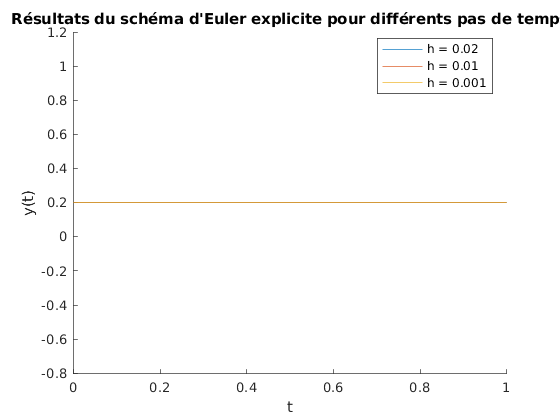

In [21]:
% Définition de la fonction f
f = inline('-150*y + 30', 't', 'y');

% Condition initiale
y0 = 1/5;

% Intervalle de temps
T = 1;

% Différents pas de temps
h_values = [0.02, 0.01, 0.001];

figure;
hold on;

for i = 1:length(h_values)
    h = h_values(i);
    
    % Calcul des itérés du schéma d'Euler explicite
    y = EEx(y0, h, T, f);
    
    % Création du vecteur t contenant les points de tn = nh
    t = 0:h:T;
    
    % Tracé du graphe
    plot(t, y, 'DisplayName', ['h = ' num2str(h)]);
end

xlabel('t');
ylabel('y(t)');
title('Résultats du schéma d''Euler explicite pour différents pas de temps');
legend('Location', 'best');
hold off;

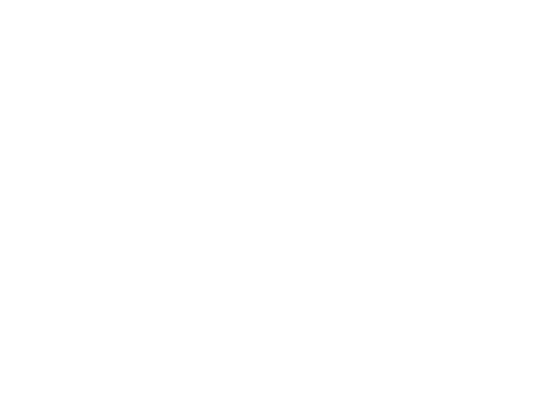

In [24]:
% Enregistrer la figure au format EPS
saveas(gcf, 'euler.eps', 'epsc');

### Question 3

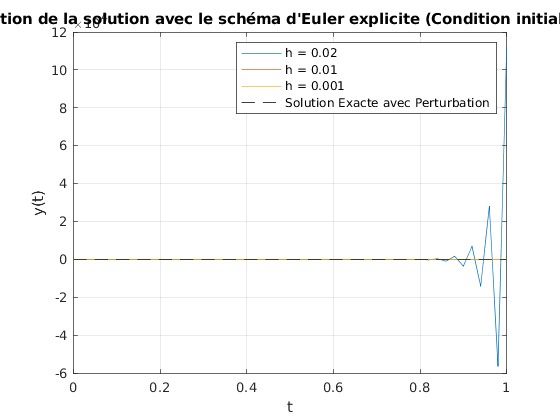

In [26]:
% Définir la fonction f
f = inline('-150*y + 30', 't', 'y');

% Définir les pas de temps
h_values = [0.02, 0.01, 0.001];

% Intervalle [0, 1]
T = 1;

% Condition initiale perturbée
epsilon = 1e-10;
y0_perturbed = 1/5 + epsilon;

% Initialiser la figure
figure;

% Boucle sur les différents pas de temps
for h = h_values
    % Appliquer le schéma d'Euler explicite
    t = 0:h:T;
    y = EEx(y0_perturbed, h, T, f);

    % Tracer le résultat
    plot(t, y, 'DisplayName', ['h = ', num2str(h)]);
    hold on;
end

% Tracer la solution exacte avec la condition initiale perturbée
t_exact = 0:0.001:T;
y_exact_perturbed = (1/5 + epsilon) * exp(-150 * t_exact) + 30/150;
plot(t_exact, y_exact_perturbed, 'k--', 'DisplayName', 'Solution Exacte avec Perturbation');

% Ajouter des labels et une légende
xlabel('t');
ylabel('y(t)');
title('Approximation de la solution avec le schéma d''Euler explicite (Condition initiale perturbée)');
legend('show');

% Afficher la grille
grid on;



In [ ]:
% Enregistrer la figure au format EPS
saveas(gcf, 'euler_perturbed.eps', 'epsc');

### Question 4

### e)

In [28]:
% Paramètres
epsilon = 1e-10;
N = 1 / epsilon;

% Différentes valeurs de h
h_values = [0.001, 0.002, 0.003, 0.004, 0.005];

% Vérifier la condition pour chaque valeur de h
for h = h_values
    condition = abs((1 - 150 * h)^N) <= 1;
    fprintf('Pour h = %f, la condition est %d\n', h, condition);
end


Pour h = 0.001000, la condition est 1
Pour h = 0.002000, la condition est 1
Pour h = 0.003000, la condition est 1
Pour h = 0.004000, la condition est 1
Pour h = 0.005000, la condition est 1


## Partie II

### Question 2

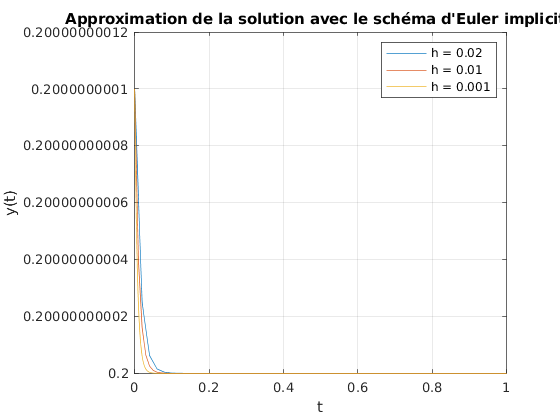

In [33]:
% Définir la fonction f
A = -150;
b = 30;
f = @(y) A * y + b;

% Paramètres
epsilon = 1e-10;
h_values = [0.02, 0.01, 0.001];
T = 1;

% Initialiser la figure
figure;

% Boucle sur les différents pas de temps
for h = h_values
    % Appliquer le schéma d'Euler implicite
    t = 0:h:T;
    y0 = 1/5 + epsilon;
    A_matrix = -150;
    b_vector = 30;
    y = EIm(y0, h, T, A_matrix, b_vector);

    % Tracer le résultat
    plot(t, y, 'DisplayName', ['h = ', num2str(h)]);
    hold on;
end

% Ajouter des labels et une légende
xlabel('t');
ylabel('y(t)');
title('Approximation de la solution avec le schéma d''Euler implicite');
legend('show');

% Afficher la grille
grid on;


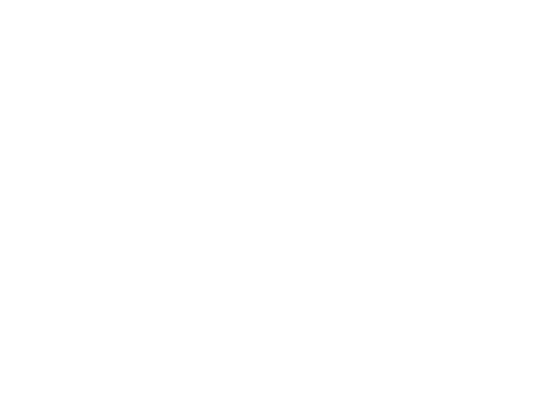

In [34]:
% Enregistrer la figure au format EPS
saveas(gcf, 'euler-implicite.eps', 'epsc');

## EXERCICE 2

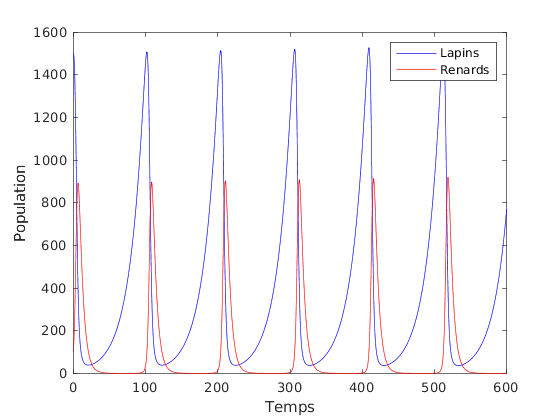

In [1]:
% Paramètres
alpha = 0.05;
beta = 0.0005;
delta = 0.0005;
gamma = 0.2;
l0 = 1500;
r0 = 100;

% Pas de temps et nombre d'itérations
h = 0.01;
N = 600/h;

% Initialisation des vecteurs de solutions
l = zeros(N+1,1);
r = zeros(N+1,1);
l(1) = l0;
r(1) = r0;

% Boucle de calcul des solutions
for n = 1:N
    l(n+1) = l(n) + h*l(n)*(alpha - beta*r(n));
    r(n+1) = r(n) + h*r(n)*(delta*l(n) - gamma);
end

% Tracé des solutions
t = (0:N)*h;
plot(t,l,'b',t,r,'r')
xlabel('Temps')
ylabel('Population')
legend('Lapins','Renards')

- La population de lapins augmente rapidement au début. Le taux de croissance des lapins est plus élevé que le taux de prédation par les renards.

- La population de renards augmente également au début, mais à un rythme plus lent. Le taux de prédation des lapins par les renards est plus élevé que le taux de mortalité des renards.

Après environ 200 jours, la population de lapins commence à diminuer. La population de renards a atteint un niveau suffisant pour prédater une quantité importante de lapins.

Après environ 400 jours, la population de renards atteint un maximum. La population de lapins est devenue trop faible pour soutenir la croissance de la population de renards.

Après environ 600 jours, la population de renards commence à diminuer. La population de lapins est devenue trop faible pour fournir de la nourriture aux renards.

## EXERCICE 3

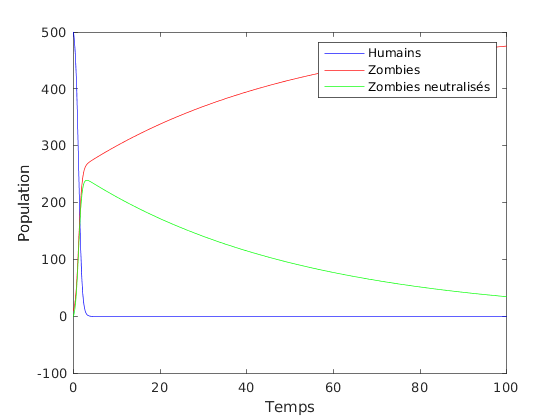

In [4]:
% Paramètres
alpha = 0.005;
beta = 0.01;
gamma = 0.02;
h0 = 500;
z0 = 10;
n0 = 0;

% Définition du système d'équations différentielles
ode = @(t,y) [ -beta*y(1)*y(2); beta*y(1)*y(2) + gamma*y(3) - alpha*y(1)*y(2); alpha*y(1)*y(2) - gamma*y(3)];

% Conditions initiales
y0 = [h0; z0; n0];

% Intervalle de temps
tspan = [0 100];

% Résolution du système d'équations différentielles
[t, y] = ode45(ode, tspan, y0);

% Tracé des solutions
plot(t, y(:,1), 'b', t, y(:,2), 'r', t, y(:,3), 'g')
xlabel('Temps')
ylabel('Population')
legend('Humains', 'Zombies', 'Zombies neutralisés')

- La population humaine diminue rapidement au début de l'invasion. En effet, la vitesse de conversion des humains en zombies est plus élevée que la vitesse de neutralisation des zombies.

- La population de zombies augmente rapidement au début de l'invasion. La vitesse de conversion des humains en zombies est plus élevée que la vitesse de réveil des zombies neutralisés.

- La population de zombies neutralisés augmente lentement au début de l'invasion. La vitesse de neutralisation des zombies est plus faible que la vitesse de conversion des humains en zombies.

Après 100 jours, la population d'humains est quasi-nulle. La population de zombies continue d'augmenter, mais à un rythme de plus en plus lent. La population de zombies neutralisés continue d'augmenter, mais à un rythme constant.